Este es el código de una red neuronal entrenada y probada para diferenciar entre bicicletas, autobuses, coches, motos, camiones y caravanas. 


Importamos la librerías necesarias:

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import model_from_json
import json

Importamos los diferentes datasets:

Para ello, utilizamos la función ImageDataGenerator, que carga las imágenes y las diferencia en clases según las carpetas. A las imágenes les realizamos un zoom para una mejor precisión y las dividimos en tamaños de batch de 100 para entrenar mejor el modelo.

In [3]:
batch_size = 100

train_data_dir = r"C:\Users\david\OneDrive\Escritorio\cardataset\train"
validation_data_dir = r"C:\Users\david\OneDrive\Escritorio\cardataset\validation"

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1,
        )

validation_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1,
        )

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')


Found 2751 images belonging to 6 classes.
Found 452 images belonging to 6 classes.


Creación de las capas del modelo:

Tras una serie de pruebas hemos llegado a la siguiente secuencia de capas neuronales, las capas y parámetros de cada una se fueron intercambiando buscando en todo momento la mejor precisión en las predicciones de las fotos y sus categorías.

In [33]:

model = Sequential()


model.add(Conv2D(36, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200, 200, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(14, (3, 3), activation='relu'))
model.add(Conv2D(18, (3, 3), activation='relu'))
model.add(Conv2D(14, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(18, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(34, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax')) 



model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
epochs = 17

Creación y guardado del modelo:

A continuación entrenamos el modelo relaizando tantos pasos por época en cada dataset dependiendo del número de fotos entre el tamaño del batch. Una vez entrenado el modelo guardamos el modelo como un json, y los pesos obtenido en formato .h5, en un archivo de disco.

In [34]:
h=model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        steps_per_epoch = 2751 //batch_size, 
        validation_steps=452 //batch_size 
)

json_string = model.to_json()
open(r'C:\Users\david\OneDrive\Escritorio\programas\model_architecture.json', 'w').write(json_string)

model.save_weights(r'C:\Users\david\OneDrive\Escritorio\programas\'model_weights.h5')

Epoch 1/17
27/27 [==============================] - 171s 6s/step - loss: 1.6878 - accuracy: 0.3323 - val_loss: 1.6671 - val_accuracy: 0.2475
Epoch 2/17
27/27 [==============================] - 148s 5s/step - loss: 1.5594 - accuracy: 0.3870 - val_loss: 1.4248 - val_accuracy: 0.4675
Epoch 3/17
27/27 [==============================] - 150s 5s/step - loss: 1.3118 - accuracy: 0.4972 - val_loss: 1.2504 - val_accuracy: 0.5275
Epoch 4/17
27/27 [==============================] - 147s 5s/step - loss: 1.1350 - accuracy: 0.5560 - val_loss: 1.0217 - val_accuracy: 0.6525
Epoch 5/17
27/27 [==============================] - 141s 5s/step - loss: 1.0094 - accuracy: 0.5911 - val_loss: 1.0236 - val_accuracy: 0.5775
Epoch 6/17
27/27 [==============================] - 142s 5s/step - loss: 0.9559 - accuracy: 0.6222 - val_loss: 0.8141 - val_accuracy: 0.7150
Epoch 7/17
27/27 [==============================] - 148s 5s/step - loss: 0.8836 - accuracy: 0.6533 - val_loss: 0.7551 - val_accuracy: 0.7100
Epoch 8/17
27

Resultado del modelo:

Tanto la precisión del conjunto de entrenamiento como la del validación son relativamente altos, sin embargo el de validación varía mucho comparado con el de entrenamiento.

Esto se debe a que las fotos son en general, difusas, la mayoría de fotos de vehículos son de diferentes modelos en diferentes situaciones pues se les saca la foto en la carretera, esto genera muchas características que no son deseables y disminuyen el % de acierto. Por otro lado hay algunas clases muy parecidas como la de coche y caravana que dificultan las predicciones.


Visualización del modelo:

Para visualizar los datos del entrenamiento medimos la precisión y pérdida de ambos conjuntos de datos.

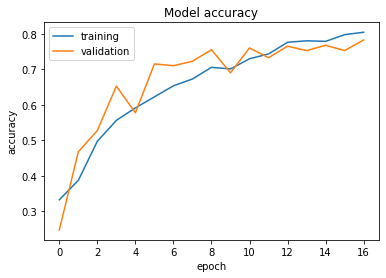

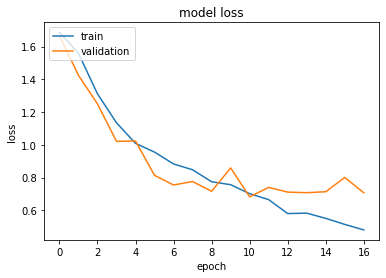

In [35]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()


plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Matriz de confusión:

En la siguiente matriz podemos ver las clases más acertadas y las que tuvieron más fallos. Gracias a la normalizacion realizada son más sencillas de ver.

El orden de las clases por columna de izquierda a derecha: 
  Bicicleta 
  Autobus 
  Coche
  Moto 
  Camion 
 Caravana 


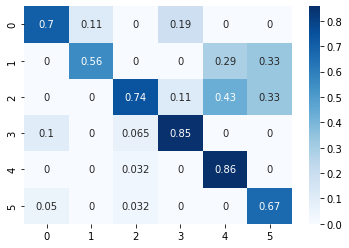

In [35]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model = model_from_json(open(r'C:\Users\david\OneDrive\Escritorio\programas\model_architecture.json').read())

model.load_weights(r'C:\Users\david\OneDrive\Escritorio\programas\'model_weights.h5')

result = []
contador=0
numeroDeImagenes=452
for x, y in validation_generator:
        result.append((y,model.predict(x)))
        if contador<numeroDeImagenes:
                break
        contador+=1
results=np.concatenate(result,axis=1)



predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

normalized_matrix= cf_matrix/cf_matrix.astype(np.float).sum(axis=1)

sns.heatmap(normalized_matrix, annot=True, cmap="Blues")

print("El orden de las clases por columna de izquierda a derecha: \n  Bicicleta \n  Autobus \n  Coche\n  Moto \n  Camion \n Caravana ")

Prueba de modelo:   

(200, 200, 3)
coches


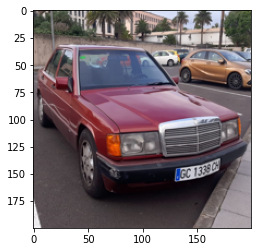

In [36]:

from matplotlib.pyplot import imshow
import json
import numpy as np
from tensorflow.keras.models import model_from_json
from PIL import Image



def one_hot_to_string(result):
    Sresults = ["bicicleta" ,"autobus", "coche", "motos", "camion" , "caravana" ]
    for r in result:
        for i in range(r.size):
            if(r[i] == 1):
                print(Sresults[i])


model = model_from_json(open(r'C:\Users\david\OneDrive\Escritorio\programas\model_architecture.json').read())

model.load_weights(r'C:\Users\david\OneDrive\Escritorio\programas\'model_weights.h5')

%matplotlib inline
pil_im = Image.open(r'C:\Users\david\OneDrive\Escritorio\mercedes.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) 

im = im.reshape(1,200,200,3)

one_hot_to_string(model.predict(im))


2º Prueba

(200, 200, 3)
Bicycle


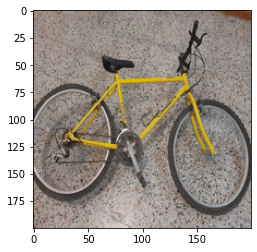

In [32]:


%matplotlib inline
pil_im = Image.open(r'C:\Users\david\OneDrive\Escritorio\bici.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) 

im = im.reshape(1,200,200,3)

one_hot_to_string(model.predict(im))

3º Prueba

(200, 200, 3)
Truck


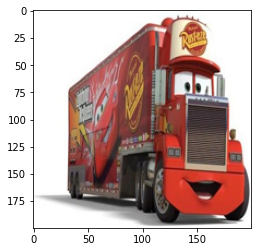

In [33]:
%matplotlib inline
pil_im = Image.open(r'C:\Users\david\OneDrive\Escritorio\camion.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) 

im = im.reshape(1,200,200,3)

one_hot_to_string(model.predict(im))